In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [8]:

df = pd.read_excel("C:/Users/ghdtk/BigData/Project/Data/교통사고 통계/일자별 교통사고.xls", header=1)

month_list = []
month_list.append(df.iloc[0][3:])
month_list.append(df.iloc[3][3:])
month_list.append(df.iloc[6][3:])
month_list.append(df.iloc[9][3:])
month_list.append(df.iloc[12][3:])
month_list.append(df.iloc[15][3:])
month_list.append(df.iloc[18][3:])
month_list.append(df.iloc[21][3:])
month_list.append(df.iloc[24][3:])
month_list.append(df.iloc[27][3:])
month_list.append(df.iloc[30][3:])
month_list.append(df.iloc[33][3:])


In [9]:
day_list = []
for month in month_list:
    for day in month:
        if(day != '-'):
            day_list.append(day)

In [10]:
df = pd.read_csv("C:/Users/ghdtk/BigData/Project/Data/날씨 데이터(서울)/서울 날씨통계.csv", encoding = 'ANSI')

In [11]:
df['교통사고_발생건수'] = day_list

In [12]:
weather = []
for i in range(len(df)):
    if(df.iloc[i]['일 최심적설(cm)'] >= 0):
        weather.append("눈")
    elif(df.iloc[i]['일강수량(mm)'] >= 0):
        weather.append('비')
    else:
        weather.append("맑음")
df['날씨'] = weather
df

,지점,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),...,1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),안개 계속시간(hr),교통사고_발생건수,날씨
0,108,2019-01-01,-5.0,-8.2,631,-0.6,1525,NaN,NaN,NaN,...,6.1,9.1,14.9,17.1,1.0,1.4,NaN,NaN,352.0,맑음
1,108,2019-01-02,-4.9,-8.8,802,0.2,1458,NaN,NaN,NaN,...,5.9,8.9,14.7,17.1,1.3,1.9,NaN,NaN,514.0,맑음
2,108,2019-01-03,-3.5,-8.4,726,3.2,1436,NaN,NaN,NaN,...,5.8,8.8,14.7,17.0,1.4,2.0,NaN,NaN,497.0,맑음
3,108,2019-01-04,-1.1,-6.2,757,4.1,1504,NaN,NaN,NaN,...,5.7,8.7,14.5,17.0,0.9,1.3,NaN,NaN,541.0,맑음
4,108,2019-01-05,-2.8,-5.5,2358,1.1,1521,NaN,NaN,NaN,...,5.5,8.6,14.5,16.9,1.4,2.0,NaN,NaN,507.0,맑음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,108,2019-12-27,-1.7,-4.6,724,2.6,1442,NaN,NaN,NaN,...,7.8,10.5,15.8,17.2,1.5,2.2,NaN,NaN,654.0,맑음
361,108,2019-12-28,1.1,-3.6,336,6.1,1347,NaN,NaN,NaN,...,7.6,10.3,15.6,17.1,1.4,2.0,NaN,NaN,550.0,맑음
362,108,2019-12-29,3.8,1.1,43,6.2,1525,6.75,NaN,NaN,...,7.5,10.2,15.6,17.2,1.1,1.6,1.5,NaN,460.0,비
363,108,2019-12-30,2.7,-5.7,2359,6.8,1131,5.08,NaN,NaN,...,7.3,10.0,15.5,17.1,0.9,1.3,0.3,NaN,619.0,비


In [19]:
model=ols('교통사고_발생건수~weather', df).fit()

print (anova_lm(model))

             df        sum_sq      mean_sq         F    PR(>F)
weather     2.0  1.060994e+04  5304.969997  0.542907  0.581529
Residual  362.0  3.537252e+06  9771.415590       NaN       NaN


In [13]:
sunny_day = df[df['날씨'] == '맑음']
rainy_day = df[df['날씨'] == '비']
snowy_day = df[df['날씨'] == '눈']

In [14]:
sunny_day_accident_rate = sunny_day['교통사고_발생건수'].sum() / len(sunny_day)
rainy_day_accident_rate = rainy_day['교통사고_발생건수'].sum() / len(rainy_day)
snowy_day_accident_rate = snowy_day['교통사고_발생건수'].sum() / len(snowy_day)

print(sunny_day_accident_rate, rainy_day_accident_rate, snowy_day_accident_rate)

626.9247787610619 634.3511450381679 601.875


In [15]:
rainy_day[['일강수량(mm)', '교통사고_발생건수']].corr()

,일강수량(mm),교통사고_발생건수
일강수량(mm),1.000000,0.176784
교통사고_발생건수,0.176784,1.000000


In [16]:
snowy_day[['일 최심적설(cm)', '교통사고_발생건수']].corr()

,일 최심적설(cm),교통사고_발생건수
일 최심적설(cm),1.000000,-0.104598
교통사고_발생건수,-0.104598,1.000000


In [17]:
def LeastSquareMethod(X, Y):
    x_bar = sum(X) / len(X)
    y_bar = sum(Y) / len(Y)
    
    a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y,X))])
    a /= sum([(x - x_bar) ** 2 for x in X])
    b = y_bar - a * x_bar
    print('slope : ', a, 'intercept : ', b)
    
    line_x = np.arange(min(X), max(X), 0.01)
    line_y = a * line_x + b
    
    plt.plot(line_x, line_y, 'r-')
    

In [18]:
model = ols("교통사고_발생건수~weather", df).fit()
print(anova_lm(model))

             df        sum_sq      mean_sq         F    PR(>F)
weather     2.0  1.060994e+04  5304.969997  0.542907  0.581529
Residual  362.0  3.537252e+06  9771.415590       NaN       NaN


slope :  1.332768605380217 intercept :  625.3636046870772


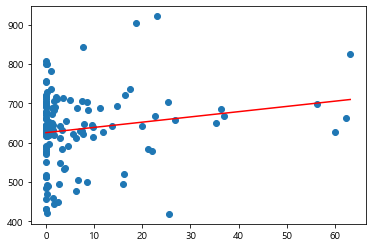

In [20]:
plt.scatter("일강수량(mm)", "교통사고_발생건수", data = rainy_day)
LeastSquareMethod(rainy_day['일강수량(mm)'], rainy_day['교통사고_발생건수'])

In [15]:
snowy_day['일최심적설'] = snowy_day['일 최심적설(cm)']
m1 = ols ("교통사고_발생건수~일최심적설", data=snowy_day).fit()
m1.summary()

<ipython-input-15-5b62b0fb7973>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snowy_day['일최심적설'] = snowy_day['일 최심적설(cm)']
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              교통사고_발생건수   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.154
Method:                 Least Squares   F-statistic:                   0.06637
Date:                Sat, 05 Jun 2021   Prob (F-statistic):              0.805
Time:                        14:18:43   Log-Likelihood:                -45.145
No. Observations:                   8   AIC:                             94.29
Df Residuals:                       6   BIC:                             94.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    607.4154     35.220     17.246      0.000     521.235     693.595
일최심적설         -6.1560     23.895     -0.258      0.805     -64.625      52.313
==============================================================================
Omnibus:                        1.795   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.407   Jarque-Bera (JB):                0.858
Skew:                           0.396   Prob(JB):                        0.651
Kurtosis:                       1.606   Cond. No.                         2.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

slope :  -6.1559633027522915 intercept :  607.415366972477


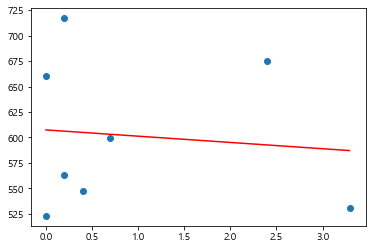

In [21]:
plt.scatter("일 최심적설(cm)", "교통사고_발생건수", data = snowy_day)
LeastSquareMethod(snowy_day['일 최심적설(cm)'], snowy_day['교통사고_발생건수'])

             df        sum_sq      mean_sq         F    PR(>F)
날씨          2.0  1.060994e+04  5304.969997  0.542907  0.581529
Residual  362.0  3.537252e+06  9771.415590       NaN       NaN


<AxesSubplot:xlabel='날씨', ylabel='교통사고_발생건수'>

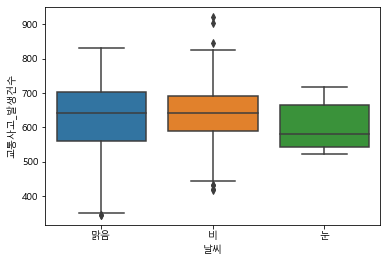

In [13]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns

model=ols('교통사고_발생건수~날씨', df).fit()

print (anova_lm(model))
sns.boxplot(x='날씨', y='교통사고_발생건수', data = df)